In [4]:
import pandas as pd
from pipeline import col_transform, full_pipeline
from sklearn.model_selection import train_test_split

data = pd.read_csv('CarsData.csv')
print(data.shape)

y = data.price
X = data.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

transformer = full_pipeline
input_transformed = transformer.fit_transform(X_train, y_train)
# pd.DataFrame(inpnut_transformed.todense())
input_transformed.shape

(97712, 10)
[Pipeline] ......... (step 1 of 4) Processing transform, total=   0.2s
[Pipeline] ............. (step 2 of 4) Processing dense, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing k_best, total=   3.4s
[Pipeline] ............... (step 4 of 4) Processing pca, total=   0.4s


(87940, 17)

In [25]:
import numpy as np
np.sum(np.array(inpnut_transformed.todense()).std(axis = 0) ** 2 < 0.03)
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
selected = sel.fit_transform(np.array(inpnut_transformed.todense()))
selected.shape

(87940, 49)

[6.03174107e+04 6.37637509e+03 2.70964731e+04 1.25247196e+03
 9.78730103e+01 3.53566365e+01 5.43898305e+01 5.00191189e-01
 7.75533749e+02 6.34955808e+02 4.81647285e+02 2.52888077e+01
 6.22377197e+02 3.92433711e+02 8.62082049e+01 7.79854573e-01
 1.81993627e+01]


<Axes: title={'center': 'ANOVA'}>

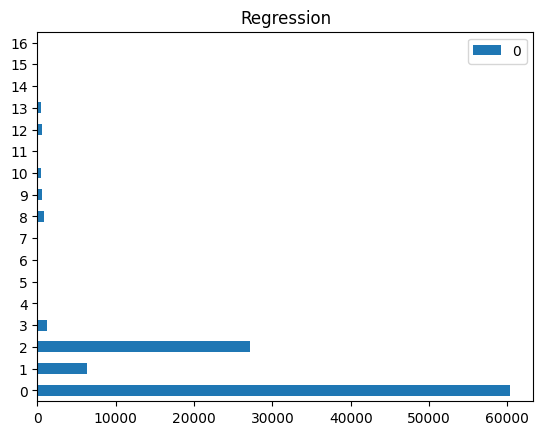

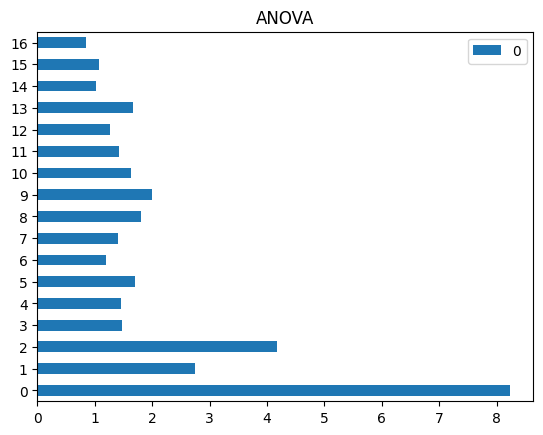

In [9]:
from sklearn.feature_selection import f_regression, chi2, f_classif, mutual_info_classif

scores_regression, p_vals_reg = f_regression(input_transformed, y_train)
print(scores_regression)
# scores_chi2, p_vals_chi2 = chi2(input_transformed, y_train)
scores_anova, p_vals_anova = f_classif(input_transformed, y_train)
# scores_mi = mutual_info_classif(input_transformed, y_train)
pd.DataFrame(scores_regression).plot(kind='barh', title='Regression')
# pd.DataFrame(scores_chi2).plot(kind='barh', title='Chi squared')
pd.DataFrame(scores_anova).plot(kind='barh', title='ANOVA')
# pd.DataFrame(scores_mi).plot(kind='barh', title='Mutual Information')